In [ ]:
#!pip install utils

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#For 3D plots
from mpl_toolkits.mplot3d import Axes3D
# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
col = ["population", "profit"]
df = pd.read_csv("ex1data1.txt", names=col)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
x=df['population']
x

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: population, Length: 97, dtype: float64

In [ ]:
y=pd.DataFrame(df['profit'])
y

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


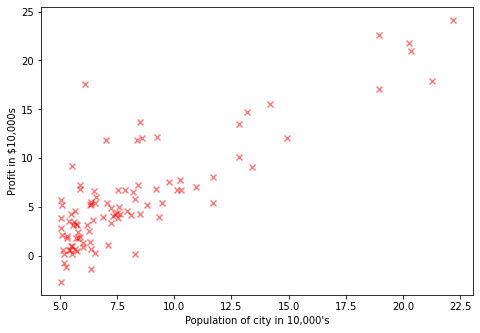

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Population of city in 10,000's")
axes.set_ylabel("Profit in $10,000s")
axes.scatter(x,y,marker="x",color="red",alpha=0.5)

In [ ]:
temp = np.ones(x.shape)
print(x.shape)
print(temp.shape)

(97,)
(97,)


In [ ]:
x=pd.DataFrame(x)
x.insert(0, "temp", temp, True)
x

,temp,population
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
...,...,...
92,1.0,5.8707
93,1.0,5.3054
94,1.0,8.2934
95,1.0,13.3940


In [ ]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [ ]:
alpha = 0.01
iterations = 3000
print((theta.T).shape)
print((x.T).shape)
print(theta.shape)
print(x.shape)

(1, 2)
(2, 97)
(2, 1)
(97, 2)


In [ ]:
def compute_cost(X, Y, theta_val):
    m = X.shape[0]
    h = X.dot((theta_val))
    dif = (h-Y.values)**2
    dif = dif.sum()
    j=dif/(2*m)
    return j

In [ ]:
# #Calculating the cost function for alpha =0
# J=0
# m=x.shape[0] # m = 97
# h = x.dot((theta).to_numpy())
# dif = h-y.values
# #print(h)
# #print(y)
# #print(dif)
# #print(type(h))
# #print(type(y))
# dif = dif**2
# s = dif.sum()
# J = (s)/(2*m)
# J #The value of J if theta0 and theta1 = 1

j = compute_cost(x, y, theta)
print(j)

0    32.072734
dtype: float64


In [ ]:
# #Calculating the cost function for alpha =0 and theta = [-1,2]
j = compute_cost(x, y, np.array([[-1],[2]]))
print(j)

0    54.242455
dtype: float64


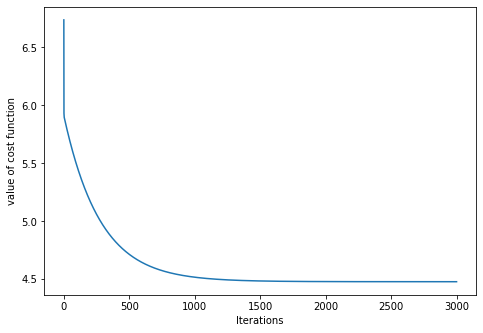

In [ ]:
m = x.shape[0]
theta = np.zeros((2,1))
j_compute = []
theta0_compute = []
theta1_compute = []
it = [i for i in range(iterations)] #3000
# print(theta.shape)
for i in range(iterations):
    h = x.dot((theta))
    dif = h-y.values
    step = (alpha/m)*((x.T).dot((dif).to_numpy()))
    theta = theta - step
    J=compute_cost(x, y, theta)
    j_compute.append(J)
j_graph = plt.figure()
axes = j_graph.add_axes([0,0,1,1])
axes.set_xlabel("Iterations")
axes.set_ylabel("value of cost function")
axes.plot(it, j_compute)

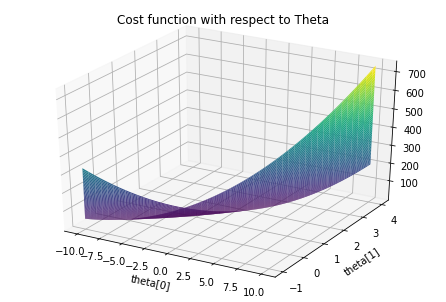

Text(0.5, 1.0, 'Contour, showing minimum')

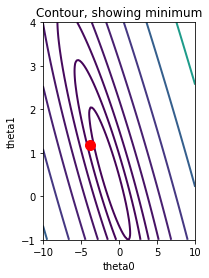

In [ ]:
#Visualizing J with respect to various values of theta
theta0_compute = np.linspace(-10, 10, 100);
theta1_compute = np.linspace(-1, 4, 100);
cost_compute = np.zeros((theta0_compute.shape[0], theta1_compute.shape[0]))
for i,theta0 in enumerate(theta0_compute):
    for j,theta1 in enumerate(theta1_compute):
        cost_compute[i, j] = compute_cost(x, y, np.array([[theta0], [theta1]]))
#Generating the surface plot
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(theta0_compute, theta1_compute, cost_compute,cmap='viridis')
axes.set_xlabel("theta[0]")
axes.set_ylabel("theta[1]")
axes.set_title('Cost function with respect to Theta')
plt.show()
#Generating countour plot
ax = plt.subplot(122)
plt.contour(theta0_compute, theta1_compute, cost_compute, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta.iloc[0], theta.iloc[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')

In [ ]:
#calculating the cost of x = [1,3.5]
temp_x = np.array([1,3.5])
h = temp_x.dot(theta)
print(h*10000)
temp_x = np.array([1,7.0])
h=temp_x.dot(theta)
print(h*10000)

[2913.32586101]
[44607.16347252]


In [ ]:
x = pd.DataFrame(x)
x.drop(x.columns[0], axis=1, inplace = True)

(97, 1)
(2, 1)


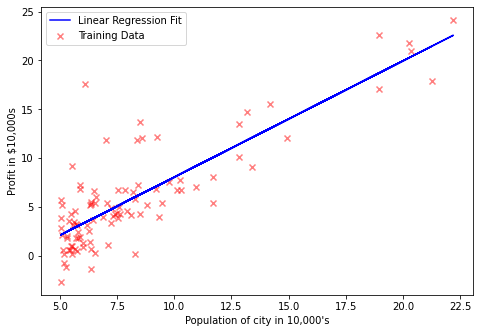

In [ ]:
#Fitting the data with obtained parameters
theta = pd.DataFrame(theta)
x = pd.DataFrame(x)
print(x.shape)
print(theta.shape)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Population of city in 10,000's")
axes.set_ylabel("Profit in $10,000s")
axes.scatter(x,y,marker="x",color="red",alpha=0.5, label="Training Data")
cost = [i*theta.iloc[1]+theta.iloc[0] for i in x["population"]]
axes.plot(x,cost, color = "blue", label="Linear Regression Fit")
axes.legend()